In [1]:
# 필수 라이브러리 다운
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해 줍니다. 차후 버전관리를 위해 필요한 정보라고 생각하시면 주석처리 하시면 됩니다.

%matplotlib inline

In [2]:
# 한글 폰트 깨짐 현상 방지
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin':
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')

In [3]:
# 데이터 불러오기
train = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 물류 유통량 예측 경진대회/물류 유통량 예측 경진대회/train.csv')
test = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 물류 유통량 예측 경진대회/물류 유통량 예측 경진대회/test.csv')

In [4]:
train.shape, test.shape

((31684, 5), (7920, 4))

In [5]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [6]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [8]:
train.describe()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


# 결측치 확인

In [9]:
# 결측치 확인
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [10]:
test.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
dtype: int64

In [11]:
# 결측치 없음

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,31684.0,1.584150e+04,9.146527e+03,0.000000e+00,7.920750e+03,1.584150e+04,2.376225e+04,3.168300e+04
송하인_격자공간고유번호,31684.0,4.648814e+15,8.341336e+14,1.111000e+15,4.713000e+15,5.011000e+15,5.013001e+15,5.013001e+15
수하인_격자공간고유번호,31684.0,3.801369e+15,1.314660e+15,1.111000e+15,2.826000e+15,4.159000e+15,5.011000e+15,5.013001e+15
운송장_건수,31684.0,4.879308e+00,6.756473e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,4.130000e+02


In [13]:
# target = 운송장_건수
target = train['운송장_건수']

In [14]:
# 여기서 생각
# 송하인이 운송장을 작성하므로 수하인은 필요가 없지 않을까?
# 수하인은 drop 시키기

In [15]:
# 송하인_격자공간공유번호
# 격자공간고유번호는 격자공간 고유번호 - 격자공간명 - 시군구코드 - 시군구명으로 이루어짐
# 그러면 격자공간 고유번호로만 분석을 해보자
train['송하인_격자공간고유번호'] = train['송하인_격자공간고유번호'].apply(str)
train['송하인_격자공간고유번호'] = train['송하인_격자공간고유번호'].str.slice(0, 4)

In [16]:
# test도 적용
test['송하인_격자공간고유번호'] = test['송하인_격자공간고유번호'].apply(str)
test['송하인_격자공간고유번호'] = test['송하인_격자공간고유번호'].str.slice(0, 4)

In [17]:
# 수하인은 drop 시키기
train = train.drop(columns = ['수하인_격자공간고유번호'])
test = test.drop(columns = ['수하인_격자공간고유번호'])

In [18]:
# 송하인_격자공간고유번호와 물품_카테코리에 값이 뭐뭐 있는지 확인해보기
train['송하인_격자공간고유번호'].nunique(), train['물품_카테고리'].nunique()

(215, 100)

In [19]:
train['송하인_격자공간고유번호'].unique(), train['물품_카테고리'].unique()

(array(['5011', '4148', '4127', '5013', '4136', '4146', '4725', '4150',
        '4682', '4128', '2614', '3023', '4159', '2826', '4371', '3011',
        '4141', '4137', '4377', '1150', '4157', '1120', '4471', '4113',
        '4122', '4514', '4163', '1117', '2620', '4375', '2714', '3020',
        '1165', '4161', '3171', '2650', '1168', '2647', '1129', '4311',
        '4145', '4511', '2818', '4372', '4427', '4213', '4579', '4825',
        '1111', '4519', '1153', '1141', '4217', '2717', '4155', '2711',
        '4817', '4415', '4115', '2729', '4882', '2911', '4572', '4729',
        '4421', '2635', '4671', '4719', '4119', '1135', '1126', '4822',
        '1154', '1162', '4143', '4131', '4481', '4773', '4888', '4683',
        '4717', '4165', '4715', '1156', '2811', '4374', '4117', '4111',
        '2653', '4420', '2623', '2723', '2626', '4180', '4711', '4513',
        '4167', '1174', '1147', '2638', '4376', '4684', '4413', '4688',
        '4723', '4313', '1171', '4571', '2726', '4873', '2824', 

In [20]:
# 여기서 생각
# 개수가 많아서 비슷한 유형끼리 묶어도 되지 않을까
# 송하인_격자공간고유번호부터 정리해서 기준을 세워보자
print(sorted(train['송하인_격자공간고유번호'].unique()))

['1111', '1114', '1117', '1120', '1121', '1123', '1126', '1129', '1130', '1132', '1135', '1138', '1141', '1144', '1147', '1150', '1153', '1154', '1156', '1159', '1162', '1165', '1168', '1171', '1174', '2611', '2614', '2617', '2620', '2623', '2626', '2629', '2632', '2635', '2638', '2641', '2644', '2647', '2650', '2653', '2671', '2711', '2714', '2717', '2720', '2723', '2726', '2729', '2771', '2811', '2814', '2817', '2818', '2820', '2823', '2824', '2826', '2871', '2911', '2914', '2915', '2917', '2920', '3011', '3014', '3017', '3020', '3023', '3114', '3117', '3120', '3171', '3611', '4111', '4113', '4115', '4117', '4119', '4121', '4122', '4125', '4127', '4128', '4129', '4131', '4136', '4137', '4139', '4141', '4143', '4145', '4146', '4148', '4150', '4155', '4157', '4159', '4161', '4163', '4165', '4167', '4180', '4182', '4211', '4213', '4215', '4217', '4219', '4221', '4223', '4272', '4273', '4275', '4276', '4277', '4278', '4280', '4281', '4282', '4311', '4313', '4315', '4371', '4372', '4373',

In [21]:
# 1천대, 2천대, 3천대, 4천대, 5천대로 나눠보자
# 1천대, 2천대, 3천대, 4천대, 5천대로 나눠보자
def category_num(x) :
    x = int(x)
    if x < 2000 :
        return 1
    elif x < 3000 :
        return 2
    elif x < 4000 :
        return 3
    elif x < 5000 :
        return 4
    elif x < 6000 :
        return 5
    
train['격자공간고유번호_cat'] = train['송하인_격자공간고유번호'].apply(category_num)
test['격자공간고유번호_cat'] = test['송하인_격자공간고유번호'].apply(category_num)

In [22]:
train.groupby(['격자공간고유번호_cat'])['index'].count()

격자공간고유번호_cat
1     1148
2      765
3      300
4     6010
5    23461
Name: index, dtype: int64

In [23]:
# 기존 송하인_격자공간고유번호 columns drop
train = train.drop(columns = ['송하인_격자공간고유번호'])
test = test.drop(columns = ['송하인_격자공간고유번호'])

Text(0.5, 1.0, '물품에 따른 건수 ')

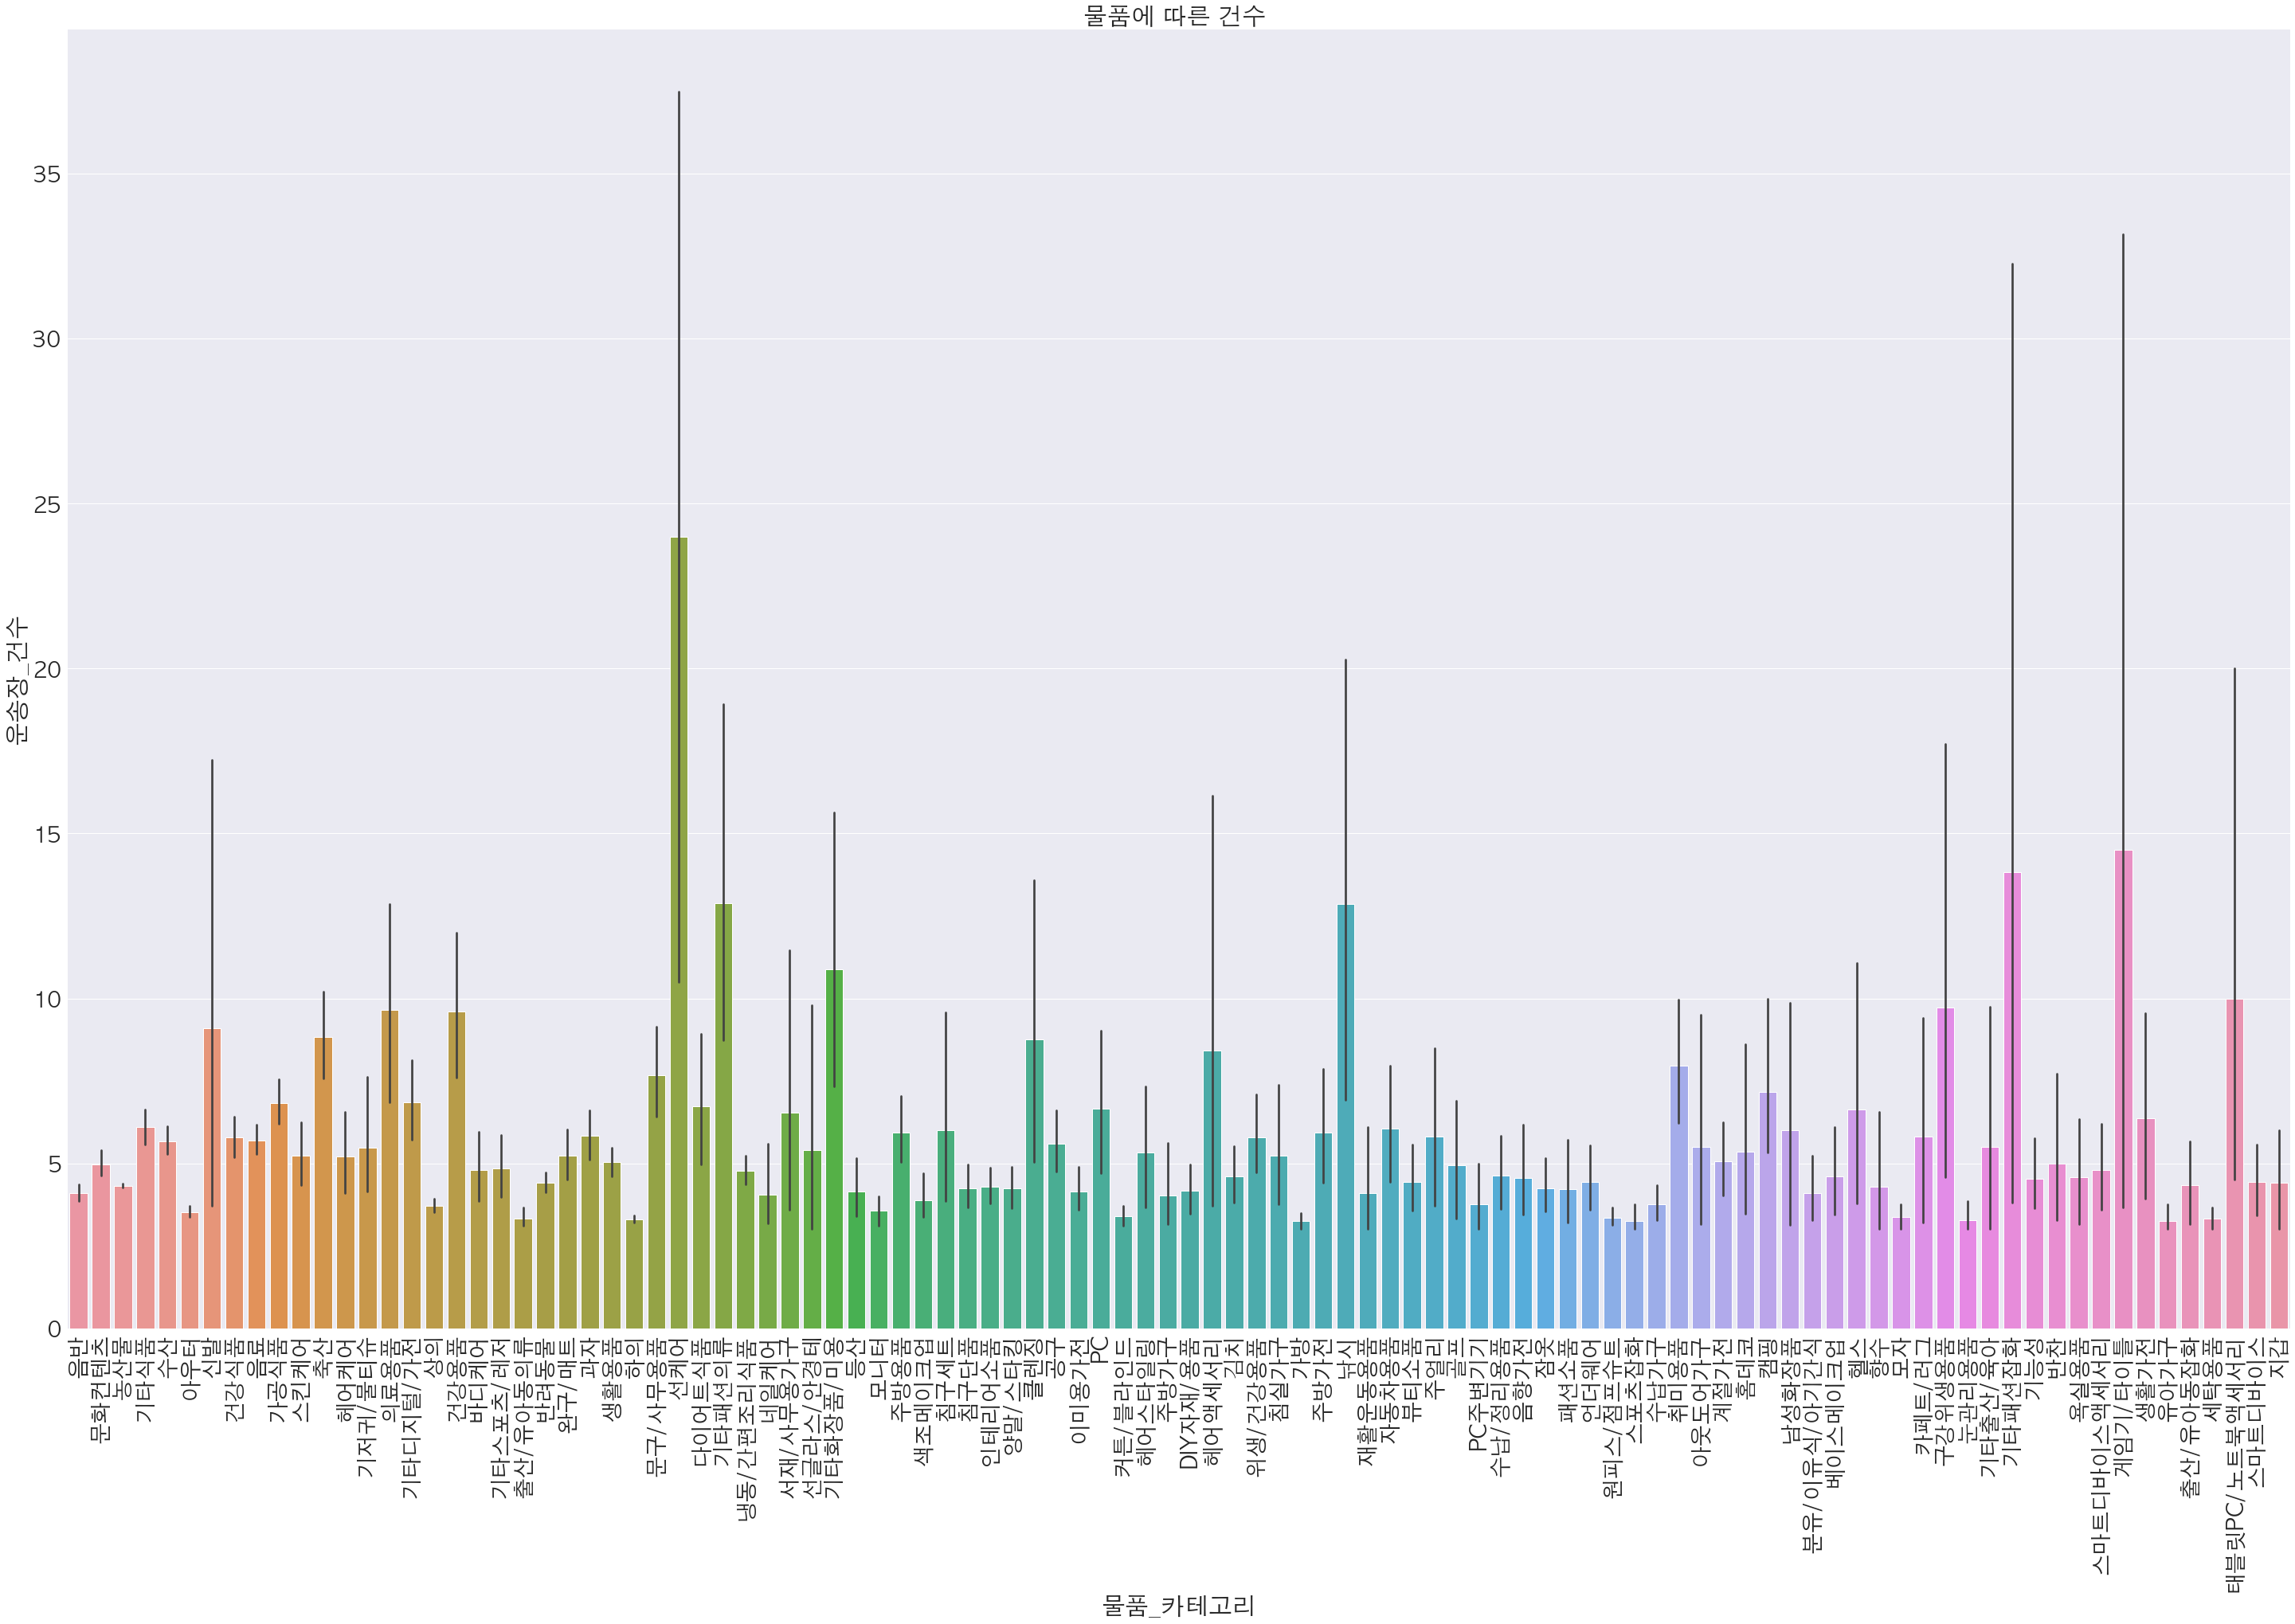

In [24]:
plt.figure(figsize = (50,30))

sns.barplot(x = train['물품_카테고리'], y = train['운송장_건수'])
plt.xticks(rotation=90)

plt.title('물품에 따른 건수 ')

In [25]:
# 평균값은 선케어 -> 게임기\타이틀 -> 기타패션\잡화순으로 제일 많음 

In [26]:
# 카테고리는 너무 많으므로 one - hot encoding을 돌려서 전처리하자.

# 데이터 전처리

In [27]:
# one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [28]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
a = train

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(a.values, i)  
                    for i in range(a.shape[1])] 
vif['features'] = a.columns

print(vif)

          VIF          features
0    1.005202             index
1    1.040749            운송장_건수
2    2.023059      격자공간고유번호_cat
3    1.035893  물품_카테고리_DIY자재/용품
4    1.007029        물품_카테고리_PC
..        ...               ...
98   1.005347    물품_카테고리_헤어스타일링
99   1.008669    물품_카테고리_헤어액세서리
100  1.045427      물품_카테고리_헤어케어
101  1.013904        물품_카테고리_헬스
102  1.023420       물품_카테고리_홈데코

[103 rows x 2 columns]


In [30]:
# VIF 10 이상인 feature 확인
print(vif[vif['VIF'] > 10]['features']) 

30    물품_카테고리_농산물
Name: features, dtype: object


In [31]:
# drop 시키기
train = train.drop(columns = ['물품_카테고리_농산물'])
test = test.drop(columns = ['물품_카테고리_농산물'])

# target 값도 drop
train = train.drop(columns = ['운송장_건수'])

In [32]:
# split
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(train, target, \
                                                   test_size = 0.2)

In [33]:
# modeling
from xgboost import XGBRegressor
model = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.03, max_depth = 8, 
                     min_child_weight = 10, n_estimators = 500, subsample = 0.7
                     , gamma = 0, nthread = 4, random_state = 42
                    )

model.fit(X_TRAIN, Y_TRAIN)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', ...)

In [34]:
y_test_predicted = model.predict(test)

In [38]:
submit = pd.read_csv('/Users/kimdaehyeon/dacon/데이콘 물류 유통량 예측 경진대회/물류 유통량 예측 경진대회/sample_submission.csv')

In [39]:
submit['운송장_건수'] = y_test_predicted
submit.head()

,index,운송장_건수
0,0,4.817225
1,1,4.007033
2,2,4.817225
3,3,3.998224
4,4,4.772559


In [43]:
# submit.to_csv('./submit.csv', index=False)

# ------------------------------------------

# 피드백, 다음에 고칠 것
#### 2등하신 분의 코드를 보면 송하인과 수하인의 격자공간고유번호를 연속형 변수로 취급안함
#### 송하인은 자릿수마다의 정보를 나눠 변수를 생성했음
#### 수하인은 자릿수 별로 변수를 생성


# 해야 될 과제
#### 데이터 정보에 따라 어떻게 나눌지 좀 더 고민해보기
#### Catboost, K-fold에 대해서 알아보기


